# Load Dataset

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [2]:
# read dataset
url = 'https://drive.google.com/file/d/14G4xOWK5e-QQ9S7GmBwULChNdeJZXs2U/view?usp=sharing'
file_id = url.split('/')[-2]
dwn_url = 'https://drive.google.com/uc?id=' + file_id

df = pd.read_csv(dwn_url)

In [3]:
from IPython.display import Image

Image(url="https://i.ibb.co/kmvzJPR/ketdataunsupervised.png")

# EDA (Exploratory Data Analysis)

## Statistical Summary

### Tipe Data

In [4]:
# mengecek tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

- Feature seharusnya memiliki tipe data *datetime* : `FFP_DATE`, `FIRST_FLIGHT_DATE`, `LOAD_TIME`, `LAST_FLIGHT_DATE`
- Feature `AGE` sebaiknya *integer*

In [5]:
# jumlah record dan feature
print('Total Record :', df.shape[0])
print('Total Features :', df.shape[1])

Total Record : 62988
Total Features : 23


In [6]:
# sampling dataset
df.sample(5)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
16902,26871,4/1/2006,4/1/2006,Male,4,haerbin,heilongjiang,CN,57.0,3/31/2014,...,4592.0,21280,2/20/2014,41,56.300000,237,1,0.675278,9803,1
2993,20279,4/20/2005,5/31/2005,Male,4,guangzhou,guangdong,CN,37.0,3/31/2014,...,11816.0,53809,3/16/2014,16,22.200000,192,3,0.815653,92899,51
47505,41068,8/6/2011,11/20/2011,Male,4,guangzhou,guangdong,CN,34.0,3/31/2014,...,2403.0,4607,7/1/2013,275,126.000000,251,0,0.689212,2556,0
42007,3696,9/27/2008,5/24/2009,Male,4,guangzhou,guangdong,CN,44.0,3/31/2014,...,1728.0,6107,1/27/2014,65,125.500000,228,0,0.690349,3522,0
3466,40194,5/15/2009,5/15/2009,Male,4,guangzhou,guangdong,CN,66.0,3/31/2014,...,8525.0,67685,3/12/2014,20,15.976744,107,5,0.607246,33113,5


### Missing Value

In [7]:
# cek data yang hilang
counts = df.isna().sum().sort_values(ascending=False)

# persentase data yang hilang
percents = round(df.isna().mean() * 100, 2).sort_values(ascending=False)

null = pd.concat([counts, percents], axis=1, keys=["null_counts", "%"])
null

,null_counts,%
WORK_PROVINCE,3248,5.16
WORK_CITY,2269,3.60
SUM_YR_1,551,0.87
AGE,420,0.67
SUM_YR_2,138,0.22
WORK_COUNTRY,26,0.04
GENDER,3,0.00
MEMBER_NO,0,0.00
LAST_FLIGHT_DATE,0,0.00
Points_Sum,0,0.00


In [8]:
# Persentase record/rows yang mengandung missing value
df_nan = df[df.isna().any(axis=1)]
print(f'Persentase missing value pada dataset : {round(len(df_nan)/len(df)*100, 2)}%')

Persentase missing value pada dataset : 7.51%


- Terdapat 5 feature yang memiliki missing value : `WORK_PROVINCE`, `WORK_CITY`, `SUM_YR_1`, `AGE`, `SUM_YR_2`, `WORK_COUNTRY`
- Dataset memiliki 7.51% missing value (dibawah 10%)

### Duplikat

In [9]:
# cek duplikat
df.duplicated().any()

False

Tidak ada data yang duplikat

### Pengelompokan Data Berdasarkan Tipe Data

In [10]:
# cek feature yang memiliki nilai numerik
nums = df.loc[:, (df.dtypes == int) | (df.dtypes == float)].columns.tolist()
print(nums)
print(f'Jumlah feature numerikal : {len(nums)}')

['AGE', 'SUM_YR_1', 'SUM_YR_2', 'AVG_INTERVAL', 'avg_discount']
Jumlah feature numerikal : 5


In [11]:
# cek data yang memiliki nilai kategorik
cats = df.loc[:, (df.dtypes == object)].columns.tolist()
print(cats)
print(f'Jumlah feature kategorikal : {len(cats)}')

['FFP_DATE', 'FIRST_FLIGHT_DATE', 'GENDER', 'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY', 'LOAD_TIME', 'LAST_FLIGHT_DATE']
Jumlah feature kategorikal : 8


In [12]:
# split data berdasarkan kategori
nums = ['MEMBER_NO', 'AGE', 'FFP_TIER', 'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM', 'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL', 'EXCHANGE_COUNT',
       'avg_discount', 'Points_Sum', 'Point_NotFlight']
cats = ['GENDER', 'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY', 'FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME', 'LAST_FLIGHT_DATE']

### Descriptive Statistic

In [13]:
# analisis deskriptif data numerikal
df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
MEMBER_NO,62988.0,31494.500000,18183.213715,1.0,15747.750000,31494.500000,47241.250000,62988.0
AGE,62568.0,42.476346,9.885915,6.0,35.000000,41.000000,48.000000,110.0
FFP_TIER,62988.0,4.102162,0.373856,4.0,4.000000,4.000000,4.000000,6.0
FLIGHT_COUNT,62988.0,11.839414,14.049471,2.0,3.000000,7.000000,15.000000,213.0
BP_SUM,62988.0,10925.081254,16339.486151,0.0,2518.000000,5700.000000,12831.000000,505308.0
SUM_YR_1,62437.0,5355.376064,8109.450147,0.0,1003.000000,2800.000000,6574.000000,239560.0
SUM_YR_2,62850.0,5604.026014,8703.364247,0.0,780.000000,2773.000000,6845.750000,234188.0
SEG_KM_SUM,62988.0,17123.878691,20960.844623,368.0,4747.000000,9994.000000,21271.250000,580717.0
LAST_TO_END,62988.0,176.120102,183.822223,1.0,29.000000,108.000000,268.000000,731.0
AVG_INTERVAL,62988.0,67.749788,77.517866,0.0,23.370370,44.666667,82.000000,728.0


**Observasi :**
- Mayoritas feature memiliki nilai mean > median yang menandakan feature cenderung berdistribusi positively skewed.
- `MEMBER_NO`, `FFP_TIER` dan `avg_discount` memiliki nilai mean yang hampir sama dengan median yang menandakan fitur tersebut cenderung mendekati distribusi normal.
- Nilai maksimal pada feature `AGE` adalah 110, usia ini terlalu tua.
- Terdapat nilai 0 yaitu `BP_SUM`, `SUM_YR_1`, `SUM_YR_2`, `AVG_INTERVAL`, `MAX_INTERVAL`, `EXCHANGE_COUNT`, `avg_discount`, `Points_Sum`, `Point_NotFlight`.

In [14]:
# analisis deskriptif data kategorikal
df[cats].describe().T

,count,unique,top,freq
GENDER,62985,2,Male,48134
WORK_CITY,60719,3234,guangzhou,9386
WORK_PROVINCE,59740,1165,guangdong,17509
WORK_COUNTRY,62962,118,CN,57748
FFP_DATE,62988,3068,1/13/2011,184
FIRST_FLIGHT_DATE,62988,3406,2/16/2013,96
LOAD_TIME,62988,1,3/31/2014,62988
LAST_FLIGHT_DATE,62988,731,3/31/2014,959


In [15]:
# Persentase
print(f'% Male      : {round(48134/62985*100, 2)}')
print(f'% guangzhou : {round(9386/60719*100, 2)}')
print(f'% guangdong : {round(17509/59740*100, 2)}')
print(f'% CN        : {round(57748/62962*100, 2)}')

% Male      : 76.42
% guangzhou : 15.46
% guangdong : 29.31
% CN        : 91.72


**Observasi :**
- Sebagian besar 76.42% user yang menggunakan maskapai adalah Laki-laki
- Mayoritas user yang menggunakan maskapai berasal dari kota guangzhou dengan persentase sebesar 15.46%
- Mayoritas user yang menggunakan maskapai berasal dari provinsi guangdong dengan persentase sebesar 29.31%
- Kode CN merupakan negara mayoritas user berasal dengan persentase sebesar 91.72%


In [16]:
# Jumlah cats
for col in cats:
    print(f'''Value count kolom {col}:''')
    print('-' * 50)
    print(df[col].value_counts())
    print()

Value count kolom GENDER:
--------------------------------------------------
Male      48134
Female    14851
Name: GENDER, dtype: int64

Value count kolom WORK_CITY:
--------------------------------------------------
guangzhou    9386
beijing      7845
shanghai     5001
shenzhen     3605
dalian       1979
             ... 
KASUGAI         1
hainan          1
xinxishi        1
KA              1
lingshui        1
Name: WORK_CITY, Length: 3234, dtype: int64

Value count kolom WORK_PROVINCE:
--------------------------------------------------
guangdong        17509
beijing           8014
shanghai          4998
liaoning          4182
xinjiang          2512
                 ...  
YAMAGUCHI-KEN        1
AICHIKEN             1
SOUTU HOLLAND        1
xinxixian            1
JAWATIMUR            1
Name: WORK_PROVINCE, Length: 1165, dtype: int64

Value count kolom WORK_COUNTRY:
--------------------------------------------------
CN    57748
HK      991
JP      875
KR      790
US      575
      ...  

### Rangkuman Hasil Observasi

**Hasil :**
- Dataset memiliki 23 feature dengan record 62988.
- Dataset memiliki 15 feature numerikal dan 8 feature kategorikal.
- Rekomendasi tipe data feature `FFP_DATE`, `FIRST_FLIGHT_DATE`, `LOAD_TIME`, `LAST_FLIGHT_DATE` sebaiknya menggunakan datetime dan `AGE` menggunakan integer.
- Dataset memiliki missing value dibawah 10%
- Tidak terdapat record yang duplikat.
- Distribusi feature rata-rata positively skewed.
- Terdapat usia maksimal 110 tahun.
- Nilai 0 pada feature `EXCHANGE_COUNT`, `avg_discount`, `Points_Sum`, `Point_NotFlight` kemungkinan mempresentasikan user tidak mendapat atau melakukan action dari feature tersebut.
- Nilai 0 pada feature `SUM_YR_1`, `SUM_YR_2`,  ` AVG_INTERVAL`, `MAX_INTERVAL` kemungkinan user tidak melakukan penerbangan, hal tersebut dapat dianalisis lebih lanjut.
- Mayoritas user adalah Laki-laki berasal dari China, provinsi Guangdong, kota Guangzhou

## Univariate

### Feature Numerikal

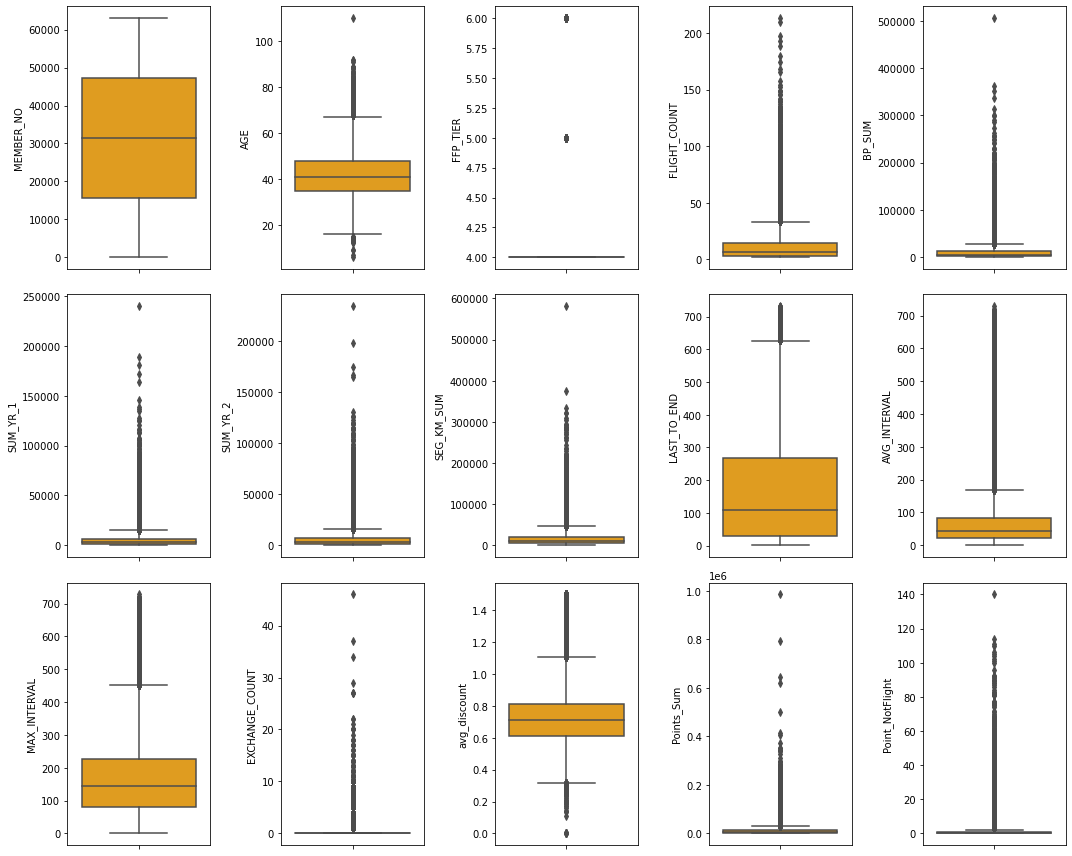

In [17]:
# cek distribusi dan outlier menggunakan boxplot
plt.figure(figsize=(15, 12))
for i in range(0, len(nums)):
    plt.subplot(3, 5, i+1)
    sns.boxplot(y=df[nums[i]], color='orange', orient='v')
    plt.tight_layout()

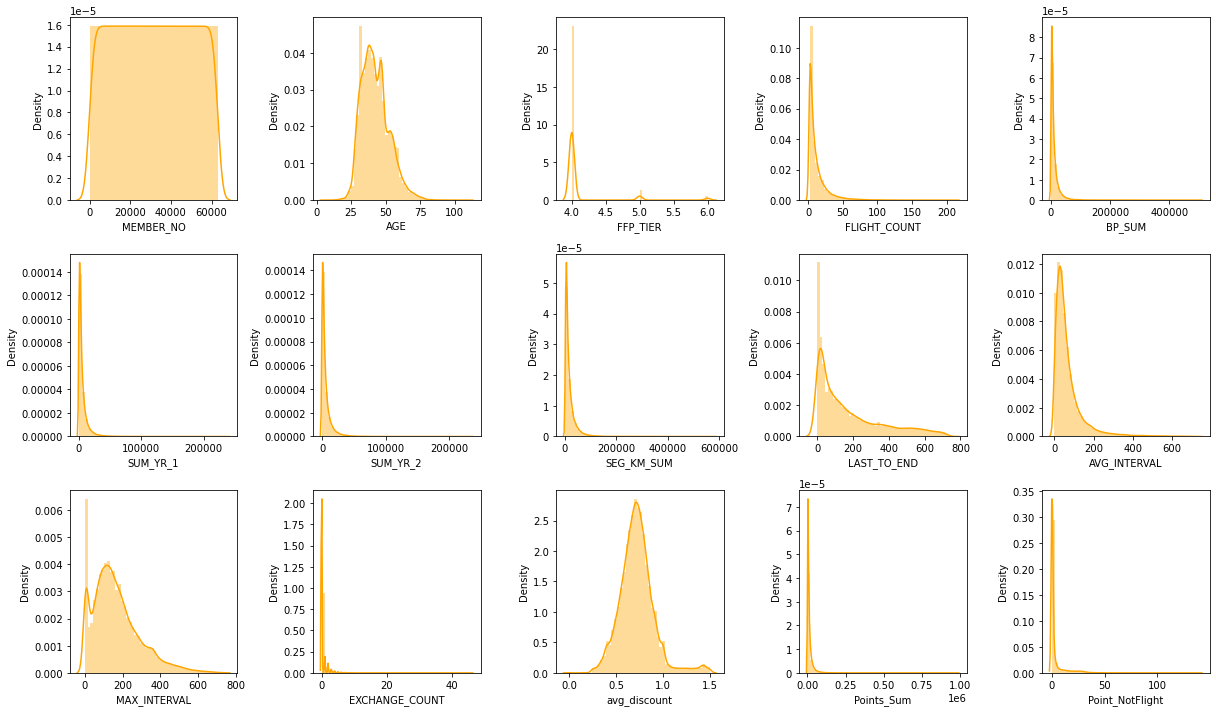

In [18]:
# cek distribusi dan skewness dengan displot
plt.figure(figsize=(17, 10))
for i in range(0, len(nums)):
    plt.subplot(3, 5, i+1)
    sns.distplot(df[nums[i]], color='orange')
    plt.tight_layout()

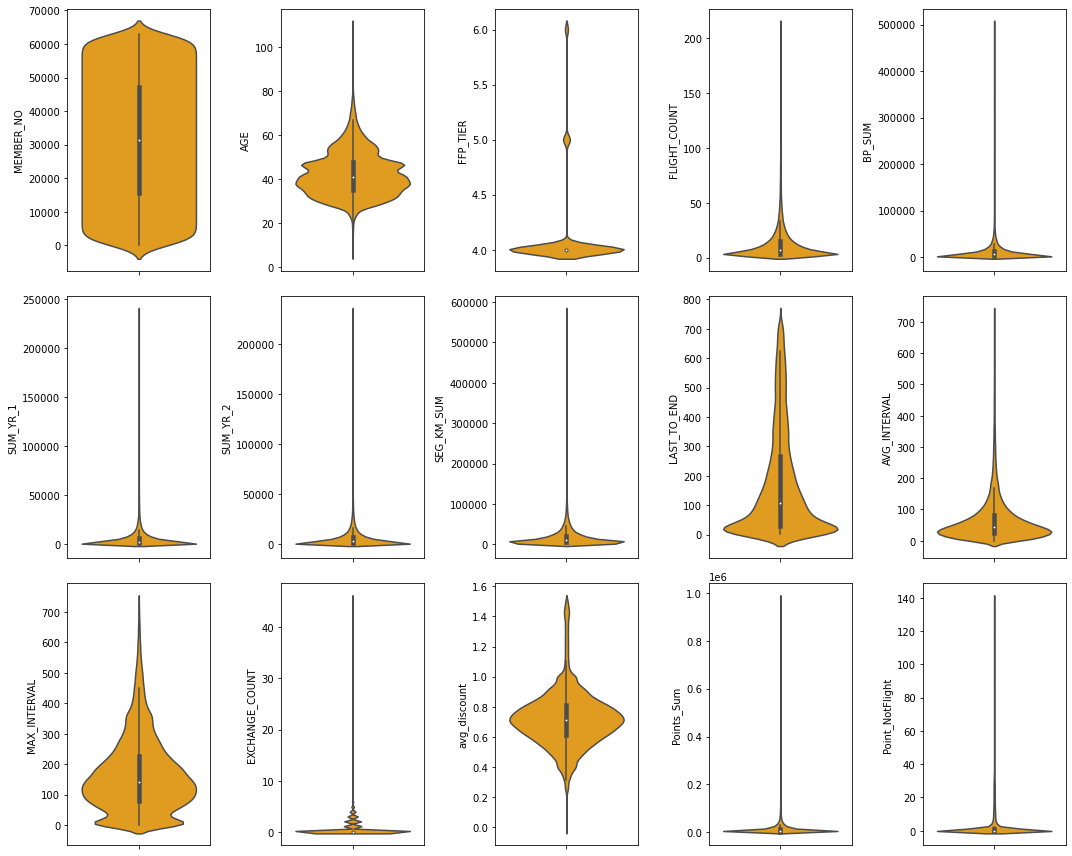

In [19]:
# cek distribusi dengan violinplot
plt.figure(figsize=(15, 12))
for i in range(0, len(nums)):
    plt.subplot(3, 5, i+1)
    sns.violinplot(y = df[nums[i]], color='orange', orient='v')
    plt.tight_layout()

### Feature Kategorikal

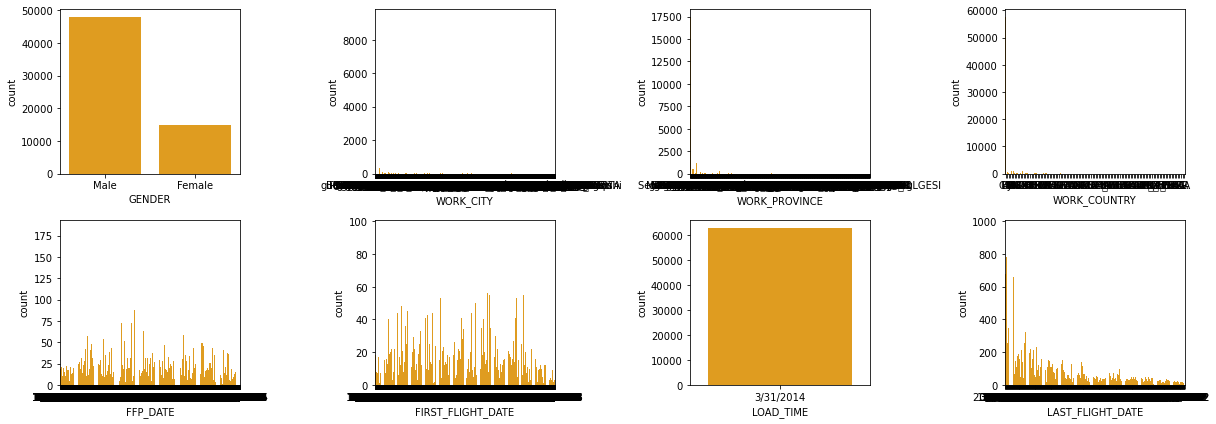

In [20]:
# countplot feature kategorikal
plt.figure(figsize=(17, 6))
for i in range(0, len(cats)):
    plt.subplot(2, 4, i+1)
    sns.countplot(df[cats[i]], color='orange', orient='h')
    plt.tight_layout()

Tidak terlalu banyak insight yang didapatkan, sehingga diputuskan untuk membuat visualisasi top 10 untuk `WORK_CITY`, `WORK_PROVINCE`, `WORK_COUNTRY`


Text(0, 0.5, 'count')

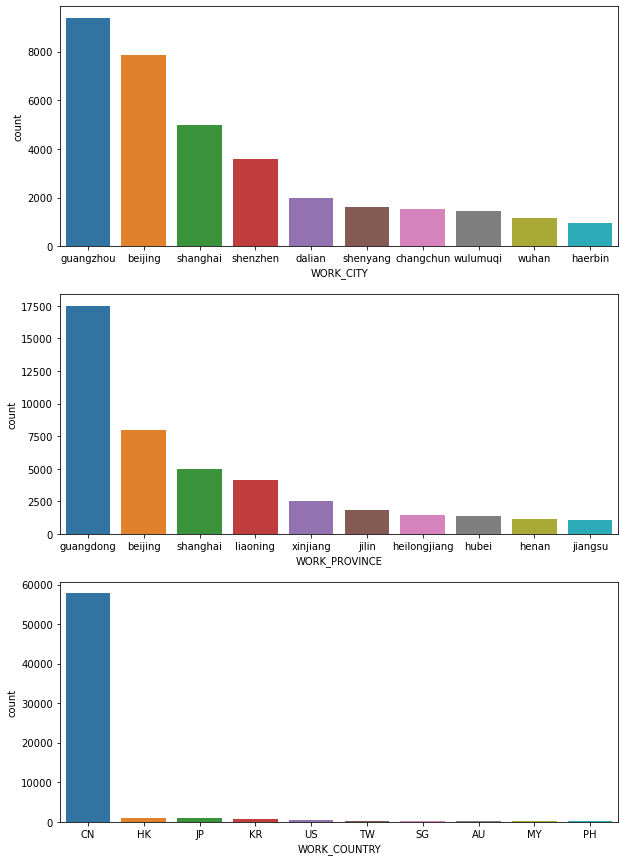

In [21]:
# membuat grafik dengan format 3 rows dengan 1 kolom
fig, ax = plt.subplots(nrows=3,ncols=1,figsize=(10,15))

# work_city
# mengambil jumlah kota dengan user 10 terbanyak
work_city_top10 = df['WORK_CITY'].value_counts().head(10)
# membuat visualisasi dalam bentuk bar
sns.barplot(x=work_city_top10.index,y=work_city_top10.values,ax=ax[0])
ax[0].set_xlabel('WORK_CITY')
ax[0].set_ylabel('count')

# work_province
# mengambil jumlah province dengan user 10 terbanyak
work_province_top10 = df['WORK_PROVINCE'].value_counts().head(10)
# membuat visualisasi dalam bentuk bar
sns.barplot(x=work_province_top10.index,y=work_province_top10.values,ax=ax[1])
ax[1].set_xlabel('WORK_PROVINCE')
ax[1].set_ylabel('count')

# work_country
# mengambil jumlah country dengan user 10 terbanyak
work_country_top10 = df['WORK_COUNTRY'].value_counts().head(10)
# membuat visualisasi dalam bentuk bar
sns.barplot(x=work_country_top10.index,y=work_country_top10.values,ax=ax[2])
ax[2].set_xlabel('WORK_COUNTRY')
ax[2].set_ylabel('count')


Visualisasi `FFP_DATE`, `FIRST_FLIGHT_DATE` dan `LAST_FLIGHT_DATE` per tahun

Text(0.5, 0, 'FIRST FLIGHT DATE YEAR')

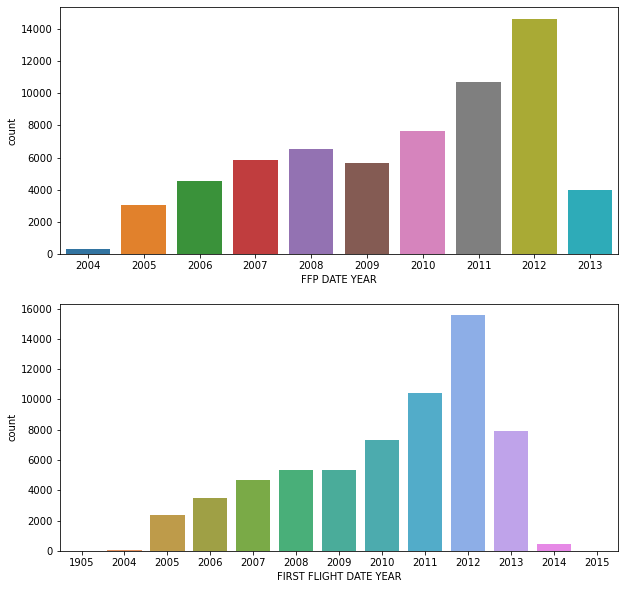

In [22]:
# membuat grafik dengan format 2 rows dengan 1 kolom
fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(10,10))

# FFP
# mengubah tipe object ke datetime
FFP = pd.to_datetime(df['FFP_DATE']).dt.year
# visualisasi
sns.countplot(x=FFP,ax=ax[0])
ax[0].tick_params(axis='x')
ax[0].set_xlabel('FFP DATE YEAR')

# FFD
# mengubah tipe object ke datetime
FFD = pd.to_datetime(df['FIRST_FLIGHT_DATE']).dt.year
# visualisasi
sns.countplot(x=FFD, ax=ax[1])
ax[1].tick_params(axis='x')
ax[1].set_xlabel('FIRST FLIGHT DATE YEAR')


Pada feature `LAST_FLIGHT_DATE` ditemukan nilai tanggal 2014/2/29 yang tidak masuk akal karena 2014 bukanlah tahun kabisat.

In [23]:
# mengcopy dataset untuk analisis sementara
df_last = df.copy()

# drop data yang memilik tanggal 2014/2/29
df_last.drop(df_last[df_last.LAST_FLIGHT_DATE.str.contains('2014/2/29')].index, inplace = True)

Text(0.5, 0, 'LAST FLIGHT DATE YEAR')

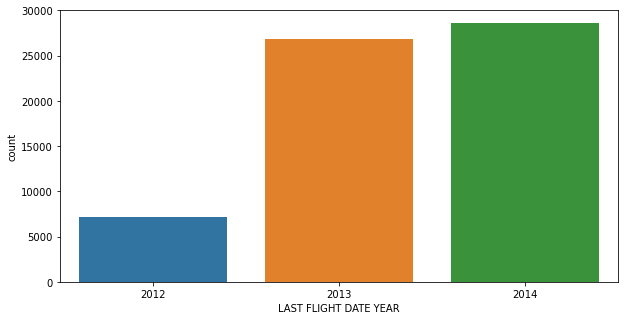

In [24]:
# membuat visualisasi
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10,5))
# mengubah tipe object ke datetime
LFD = pd.to_datetime(df_last['LAST_FLIGHT_DATE']).dt.year
# visualisasi
sns.countplot(x=LFD)
ax.set_xlabel('LAST FLIGHT DATE YEAR')

### Rangkuman Hasil Observasi

**Hasil :**
- Mayoritas feature memiliki outlier, kecuali MEMBER_NO dan FFP_TIER
- Moyaritas feature memiliki distribusi yang positively skew, kecuali pada MEMBER_NO dan avg_discount cenderung mendekati normal.
- Mayoritas user adalah laki-laki
- Mayoritas feature kategorikal memiliki nilai unik
- LOAD_TIME memiliki 1 nilai yaitu 2014-03-31
- Mayoritas user yang bergabung menjadi membership pada tahun 2012
- Terdapat nilai tahun yang sangat jauh pada featur `FIRST FLIGHT DATE` yaitu 1905
- Pada feature `LAST_FLIGHT_DATE` terdapat nilai tanggal yang tidak masuk akal yaitu tanggal 2014/2/29, tahun tersebut bukan tahun kabisat sehingga tidak ada tanggal 29 di bulan Februari.


## Multivariate

In [25]:
# korelasi antar feature
df.corr()

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
MEMBER_NO,1.000000,-0.005910,0.001259,-0.000276,0.000063,-0.002529,0.001185,-0.000032,-0.002588,0.002479,0.004761,-0.003844,0.001727,-0.003613,-0.033204
FFP_TIER,-0.005910,1.000000,0.078654,0.582447,0.581085,0.463122,0.611385,0.522350,-0.206313,-0.144928,-0.127641,0.342355,0.248845,0.559249,0.192803
AGE,0.001259,0.078654,1.000000,0.073246,0.100501,0.111815,0.083743,0.087254,-0.025600,-0.024613,0.009382,0.029604,0.133235,0.074757,-0.092282
FLIGHT_COUNT,-0.000276,0.582447,0.073246,1.000000,0.788379,0.748032,0.794838,0.850411,-0.404999,-0.316833,-0.188682,0.502501,0.139377,0.747092,0.291880
BP_SUM,0.000063,0.581085,0.100501,0.788379,1.000000,0.850624,0.884632,0.921724,-0.319039,-0.246764,-0.147953,0.530021,0.307245,0.923271,0.244254
SUM_YR_1,-0.002529,0.463122,0.111815,0.748032,0.850624,1.000000,0.663009,0.804125,-0.186173,-0.243309,-0.145206,0.488029,0.268884,0.788354,0.235095
SUM_YR_2,0.001185,0.611385,0.083743,0.794838,0.884632,0.663009,1.000000,0.849195,-0.423420,-0.246290,-0.154905,0.468149,0.234652,0.826666,0.237954
SEG_KM_SUM,-0.000032,0.522350,0.087254,0.850411,0.921724,0.804125,0.849195,1.000000,-0.369509,-0.280746,-0.155508,0.507819,0.108393,0.853014,0.259037
LAST_TO_END,-0.002588,-0.206313,-0.025600,-0.404999,-0.319039,-0.186173,-0.423420,-0.369509,1.000000,-0.108594,-0.343939,-0.169717,-0.021036,-0.292027,-0.124074
AVG_INTERVAL,0.002479,-0.144928,-0.024613,-0.316833,-0.246764,-0.243309,-0.246290,-0.280746,-0.108594,1.000000,0.724392,-0.130226,-0.038814,-0.220946,-0.075967


<AxesSubplot:>

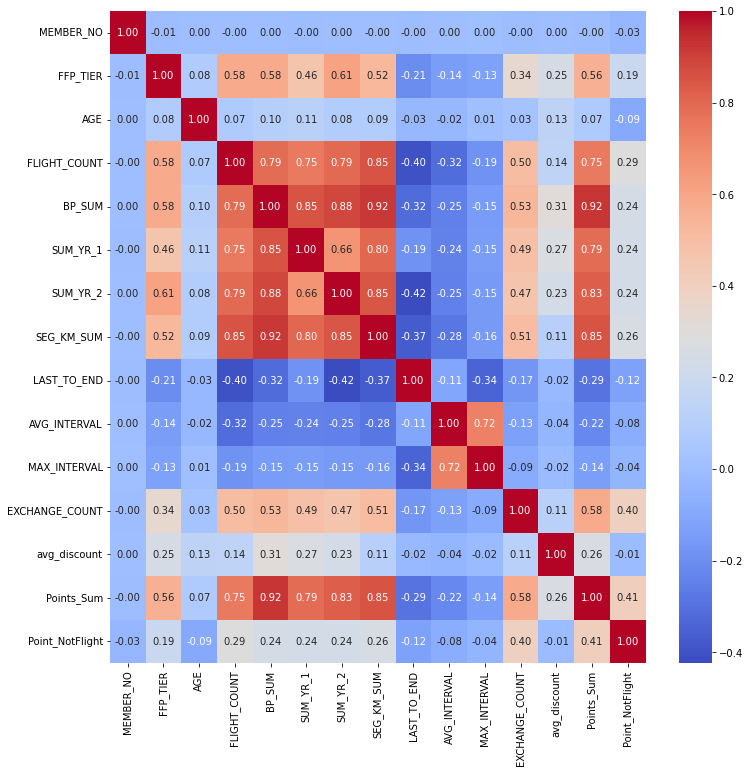

In [26]:
# heatmap korelasi antar feature
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt='.2f')

### Rangkuman Hasil Observasi

Feature yang memiliki korelasi tinggi :
- Antara feature-feature `FLIGHT_COUNT`, `BP_SUM`, `SUM_YR_1`, `SUM_YR_2`, `SEG_KM_SUM`, `Points_Sum`
- `AVG_INTERVAL` dengan `MAX_INTERVAL`
- Feature  `FLIGHT_COUNT`, `BP_SUM`,`SUM_YR_1`, `SUM_YR_2`, `SEG_KM_SUM` sangat berkorelasi satu sama lain. Semakin sering pelanggan membeli atau terbang, semakin jauh jarak penerbangan yang ditempuh dan semakin banyak pendapatan tarif.


# Feature Enginering

## Preprocessing

### Fix Datatype

Sebelum memperbaiki tipe dataset, kami memutuskan untuk menghapus feature-feature yang tidak relate dan memiliki banyak nilai unik yaitu `MEMBER_NO`, `WORK_CITY`, `WORK_PROVINCE`, `WORK_COUNTRY`, `AGE`, `GENDER`.

In [3]:
# drop kolom
df_pre = df.drop(columns=['MEMBER_NO', 'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY', 'AGE', 'GENDER']).copy()

Menghapus tanggal 2014/2/29 yang ditemukan pada `LAST_FLIGHT_DATE`.

In [4]:
# menghapus record
df_pre.drop(df_pre[df_pre.LAST_FLIGHT_DATE.str.contains('2014/2/29')].index, inplace = True)

Mengubah tipe yang memiliki feature tanggal dengan datetime.

In [5]:
# feature yang meiliki type datetime
date_feature = ['FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME','LAST_FLIGHT_DATE']

# inisialisasi
for col in date_feature:
  df_pre[col] = pd.to_datetime(df_pre[col], errors='coerce')

In [6]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62567 entries, 0 to 62987
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   FFP_DATE           62567 non-null  datetime64[ns]
 1   FIRST_FLIGHT_DATE  62567 non-null  datetime64[ns]
 2   FFP_TIER           62567 non-null  int64         
 3   LOAD_TIME          62567 non-null  datetime64[ns]
 4   FLIGHT_COUNT       62567 non-null  int64         
 5   BP_SUM             62567 non-null  int64         
 6   SUM_YR_1           62016 non-null  float64       
 7   SUM_YR_2           62429 non-null  float64       
 8   SEG_KM_SUM         62567 non-null  int64         
 9   LAST_FLIGHT_DATE   62567 non-null  datetime64[ns]
 10  LAST_TO_END        62567 non-null  int64         
 11  AVG_INTERVAL       62567 non-null  float64       
 12  MAX_INTERVAL       62567 non-null  int64         
 13  EXCHANGE_COUNT     62567 non-null  int64         
 14  avg_di

### Data Cleaning

**Handle Missing Value**

In [8]:
df_pre.isna().sum()

FFP_DATE               0
FIRST_FLIGHT_DATE      0
FFP_TIER               0
LOAD_TIME              0
FLIGHT_COUNT           0
BP_SUM                 0
SUM_YR_1             551
SUM_YR_2             138
SEG_KM_SUM             0
LAST_FLIGHT_DATE       0
LAST_TO_END            0
AVG_INTERVAL           0
MAX_INTERVAL           0
EXCHANGE_COUNT         0
avg_discount           0
Points_Sum             0
Point_NotFlight        0
dtype: int64

In [9]:
# Persentase record/rows yang mengandung missing value
df_nan = df_pre[df_pre.isna().any(axis=1)]
print(f'Persentase missing value pada dataset : {round(len(df_nan)/len(df_pre)*100, 2)}%')

Persentase missing value pada dataset : 1.1%


Dikarenakan missing value hanya sebesar 1.1% kami memutuskan untuk menghapusnya karena tidak terlalu signifikan mempengaruhi dalam pemodelan.

In [10]:
# Menghapus baris data dari missing value SUM_YR_1, SUM_YR_2
# Feature SUM_YR_1 merupakan fare revenue atau ongkos penerbangan, sedangkan SUM_YR_2 merupakan harga tiket penerbangan.
df_pre = df_pre.dropna(subset=['SUM_YR_1','SUM_YR_2'], inplace=True)

In [11]:
# cek missing value
df_pre.isna().sum()

FFP_DATE             0
FIRST_FLIGHT_DATE    0
FFP_TIER             0
LOAD_TIME            0
FLIGHT_COUNT         0
BP_SUM               0
SUM_YR_1             0
SUM_YR_2             0
SEG_KM_SUM           0
LAST_FLIGHT_DATE     0
LAST_TO_END          0
AVG_INTERVAL         0
MAX_INTERVAL         0
EXCHANGE_COUNT       0
avg_discount         0
Points_Sum           0
Point_NotFlight      0
dtype: int64

**Tambahan** <br>
Sebagai tambahan, kami akan membersihkan data sesuai dengan prosedur standar untuk dataset penerbangan (Tao, 2020) 
- Record di mana harga tiket (SUM_YR_1,SUM_YR_2) berisi nilai 0, dan diskon rata-rata (avg_discount) bukan nol, dan dimana total jarak tempuh (SEG_KM_SUM) lebih dari nol.
- Hal ini diasumsikan bahwa user tidak memiliki riwayat perjalanan

In [12]:
# drop kolom
df_pre.drop(df_pre[(df_pre['SUM_YR_1'] == 0) & (df_pre['SUM_YR_2'] == 0) & (df_pre['avg_discount'] != 0) & (df_pre['SEG_KM_SUM'] > 0)].index, inplace = True)

In [13]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61630 entries, 0 to 62986
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   FFP_DATE           61630 non-null  datetime64[ns]
 1   FIRST_FLIGHT_DATE  61630 non-null  datetime64[ns]
 2   FFP_TIER           61630 non-null  int64         
 3   LOAD_TIME          61630 non-null  datetime64[ns]
 4   FLIGHT_COUNT       61630 non-null  int64         
 5   BP_SUM             61630 non-null  int64         
 6   SUM_YR_1           61630 non-null  float64       
 7   SUM_YR_2           61630 non-null  float64       
 8   SEG_KM_SUM         61630 non-null  int64         
 9   LAST_FLIGHT_DATE   61630 non-null  datetime64[ns]
 10  LAST_TO_END        61630 non-null  int64         
 11  AVG_INTERVAL       61630 non-null  float64       
 12  MAX_INTERVAL       61630 non-null  int64         
 13  EXCHANGE_COUNT     61630 non-null  int64         
 14  avg_di

### Feature Selection

Kami memutuskan untuk menggunakan LRFMC model. Penjelasan LRFMC menurut Tao (2020) adalah sebagai berikut:
- L (LOYALTY) : Lama waktu user menjadi membership (dalam bulan) dalam diketahui dari selisih dari waktu observasi dengan waktu menjadi menjadi membership.


- R (RECENCY) : transaksi terakhir pelanggan sampai saat ini

Maka feature yang diambil :
- FPP_DATE (Frequent Flyer Program Join Date)
- LOAD_TIME (Tanggal Data Diambil)
- FLIGHT_COUNT (Jumlah Penerbangan Customer)
- AVG_DISCOUNT (Rata-rata Discount yang Diadapat Customer)
- SEG_KM_SUM (Total Jarak (km) Penerbangan yang Sudah Dilakukan)
- LAS_TO_END (Jarak Waktu Penerbangan Terakhir ke Pesanan Penerbangan Paling Terakhir)

**Select Feature yang Dibutuhkan**

In [14]:
# select feature
df_feats = df_pre[['LOAD_TIME', 'FFP_DATE', 'LAST_TO_END', 'FLIGHT_COUNT','SEG_KM_SUM','avg_discount']]

In [15]:
# membuat feature untuk loyalti dari feature yang sudah ada
df_feats['TIME_MONTH'] = ((df_pre['LOAD_TIME'] - df_pre['FFP_DATE']).dt.days/30).astype(int)

In [16]:
df_feats = df_feats[['TIME_MONTH', 'LAST_TO_END', 'FLIGHT_COUNT','SEG_KM_SUM','avg_discount']].copy()

In [17]:
df_feats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61630 entries, 0 to 62986
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TIME_MONTH    61630 non-null  int32  
 1   LAST_TO_END   61630 non-null  int64  
 2   FLIGHT_COUNT  61630 non-null  int64  
 3   SEG_KM_SUM    61630 non-null  int64  
 4   avg_discount  61630 non-null  float64
dtypes: float64(1), int32(1), int64(3)
memory usage: 2.6 MB


In [18]:
df_feats.sample(5)

,TIME_MONTH,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM,avg_discount
39064,83,42,7,5946,0.817844
12051,87,5,12,24877,0.765341
52334,24,134,3,3399,0.708114
21521,14,7,26,22353,0.507089
24528,74,43,16,17395,0.561434


### Handling Outliers

In [19]:
number = ['TIME_MONTH', 'LAST_TO_END','FLIGHT_COUNT','SEG_KM_SUM','avg_discount']

In [20]:
#Cek outlier
from scipy import stats
filtered_entries = np.array([True] * len(df_feats))

print(f'Jumlah baris sebelum memfilter outlier: {len(df_feats)}')

for col in number:
    zscore = abs(stats.zscore(df_feats[col])) # menghitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya

df_clean = df_feats[filtered_entries]
print(f'Jumlah baris setelah memfilter outlier: {len(df_clean)}')
print(f'Prsentase outlier: {round((len(df_feats)-len(df_clean))/len(df_feats)*100, 2)}%')

Jumlah baris sebelum memfilter outlier: 61630
Jumlah baris setelah memfilter outlier: 58514
Prsentase outlier: 5.06%


In [21]:
# dataset yang telah dihandling outlier
df_clean = df_clean.copy()

### Feature Standardization

In [22]:
# melihat statistical summary dataset
df_clean.describe()

,TIME_MONTH,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM,avg_discount
count,58514.000000,58514.000000,58514.000000,58514.000000,58514.000000
mean,48.466743,177.538777,10.320214,14797.815463,0.705655
std,28.028522,181.219448,9.881925,14175.233598,0.157462
min,12.000000,1.000000,2.000000,368.000000,0.171508
25%,24.000000,33.000000,3.000000,4752.000000,0.607213
50%,41.000000,112.000000,7.000000,9736.500000,0.706347
75%,71.000000,268.000000,14.000000,19908.000000,0.800000
max,114.000000,718.000000,54.000000,80475.000000,1.276565


In [23]:
# mengganti nama feature
df_clean.columns =['LOYALTY', 'RECENCY', 'FREQUENCY', 'MONETERY', 'DC']

In [24]:
# Standardisasi menggunakan StandardScaler

feats = ['LOYALTY', 'RECENCY', 'FREQUENCY', 'MONETERY', 'DC']
X = df_clean[feats].values

from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
df_std = pd.DataFrame(data = X_std, columns = feats)

In [25]:
# melihat summary statistic
df_std.describe()

,LOYALTY,RECENCY,FREQUENCY,MONETERY,DC
count,5.851400e+04,5.851400e+04,5.851400e+04,5.851400e+04,5.851400e+04
mean,6.342752e-15,-1.761849e-13,-1.114990e-13,4.817718e-15,1.013825e-14
std,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00
min,-1.301069e+00,-9.741796e-01,-8.419701e-01,-1.017968e+00,-3.392263e+00
25%,-8.729305e-01,-7.975966e-01,-7.407744e-01,-7.086939e-01,-6.251866e-01
50%,-2.664003e-01,-3.616573e-01,-3.359915e-01,-3.570565e-01,4.395005e-03
75%,8.039471e-01,4.991848e-01,3.723786e-01,3.605040e-01,5.991662e-01
max,2.338112e+00,2.982383e+00,4.420208e+00,4.633274e+00,3.625741e+00


In [27]:
df_model =df_std.copy()

# Modeling + Evaluasi

In [50]:
# pakai df_model y guys
df_model.isnull().sum()

LOYALTY      0
RECENCY      0
FREQUENCY    0
MONETERY     0
DC           0
dtype: int64

<AxesSubplot: >

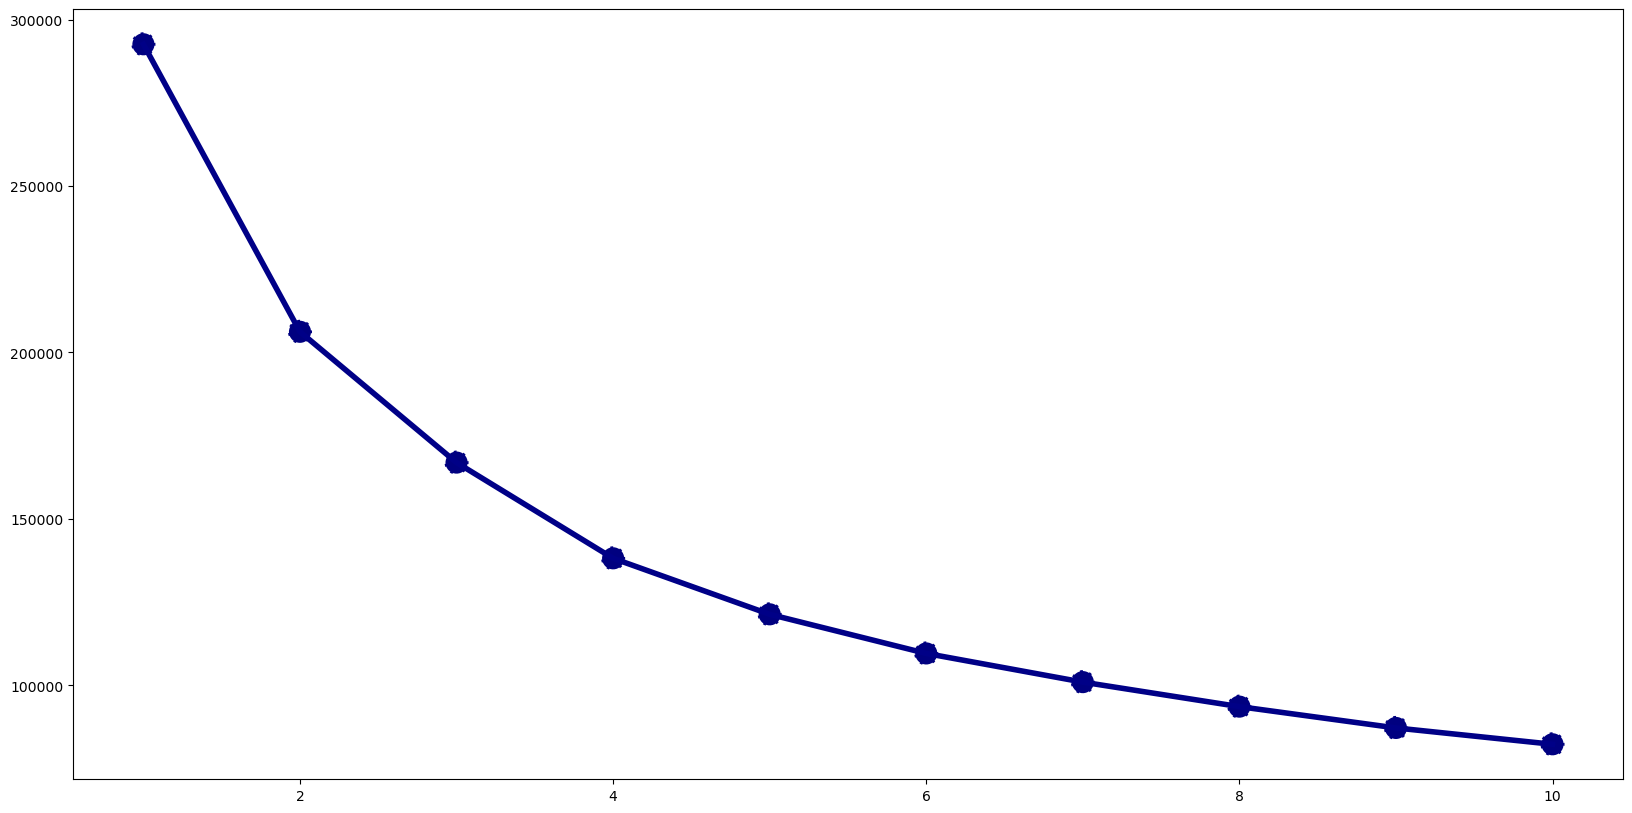

In [28]:
from sklearn.cluster import KMeans
inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_model)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(20, 10))
# plt.plot(inertia)

sns.lineplot(x=range(1, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(1, 11), y=inertia, s=300, color='#000080',  linestyle='--')

In [52]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df_model.values)

KMeans(n_clusters=4, random_state=42)

In [53]:
df_clean['cluster'] = kmeans.labels_
display(df_clean.groupby('cluster').agg(['mean','median']))

LOYALTY            RECENCY         FREQUENCY             MONETERY  \
              mean median        mean median       mean median          mean   
cluster                                                                        
0        28.838886   27.0  107.251714   89.0   7.825045    7.0  11167.659215   
1        81.098198   80.0  120.929761   98.0   8.206469    7.0  11644.399712   
2        39.858045   33.0  478.000997  472.0   3.735609    3.0   5786.107650   
3        57.040762   54.0   45.966811   22.0  28.948658   27.0  41265.263392   

                        DC            
          median      mean    median  
cluster                               
0         9444.0  0.684143  0.688265  
1        10005.0  0.714267  0.712081  
2         4292.0  0.709586  0.716965  
3        38741.0  0.741259  0.728330

In [60]:

df_model.head

<bound method NDFrame.head of         LOYALTY   RECENCY  FREQUENCY  MONETERY        DC  cluser  cluster
0      1.196408 -0.576868   4.217816  4.322659  3.321733       3        3
1     -0.908609 -0.952107   3.509446  4.203930  3.440582       3        3
2     -0.480470 -0.974180   4.116620  4.006754  3.465738       3        3
3      0.233095 -0.930034   0.068791  4.618177  2.502364       3        3
4     -1.015644 -0.930034   3.307055  3.990810  3.295698       3        3
...         ...       ...        ...       ...       ...     ...      ...
58509  2.124042 -0.488576  -0.841970 -1.017968  0.027594       1        1
58510  0.589878 -0.311993  -0.841970 -1.017968 -0.226439       1        1
58511 -0.123687 -0.764487  -0.841970 -0.969009 -3.052547       0        0
58512 -1.194035  1.580756  -0.841970 -0.980156 -2.893777       2        2
58513 -0.444792  0.576440  -0.841970 -0.990314 -2.703253       0        0

[58514 rows x 7 columns]>

In [58]:
#PCA untuk melihat visualisasi
from sklearn.decomposition import PCA 
pca = PCA(n_components=2)

pca.fit(df_model)
pcs = pca.transform(df_model)

df_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
df_pca['cluster'] = df_model['cluster']
df_pca.head()

KeyError: 'cluster'

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="cluster",
    edgecolor='black',
    linestyle='--',
    data=df_pca,
    palette=['blue','red','green','yellow'],
    s=100,
    ax=ax
)

# Interpretasi Model + Rekomendasi